## Stacking_regressor

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,GroupKFold
import datetime
import sklearn
import gc
import joblib
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm

In [2]:
import pandas as pd
train_df=pd.read_csv('train_preprocessed1.csv')
test_df=pd.read_csv('test_preprocessed1.csv')
test_df=test_df.drop(['Unnamed: 0','year_built','row_id'], axis=1)

In [3]:
train_df.head()

,Unnamed: 0,building_id,meter,meter_reading,dayofweek_x,group_x,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,relative_humidity,feels_like,is_holiday
0,45,46,0,3.993413,4,1,0,11,9.110078,2016.0,25.0,6.0,20.0,-0.174,1019.5,0.0,0.0,73.80,77.00,1
1,72,74,0,3.784219,4,1,0,8,12.867830,1997.0,25.0,6.0,20.0,-0.174,1019.5,0.0,0.0,73.80,77.00,1
2,91,93,0,3.978196,4,1,0,6,10.415443,1982.0,25.0,6.0,20.0,-0.174,1019.5,0.0,0.0,73.80,77.00,1
3,103,105,0,3.190624,4,1,1,0,10.832181,NaN,3.8,0.0,2.4,0.000,1021.0,240.0,3.1,90.56,36.94,1
4,104,106,0,0.318163,4,1,1,0,8.589514,NaN,3.8,0.0,2.4,0.000,1021.0,240.0,3.1,90.56,36.94,1


In [4]:
test_df.head()

,Unnamed: 0,row_id,building_id,meter,dayofweek_x,group_x,site_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,relative_humidity,feels_like,is_holiday
0,0,0,0,0,6,1,0,0,8.913685,2008.0,17.8,4.0,11.7,0.2827,1021.5,100.0,3.6,67.5,64.06,1
1,1,1,1,0,6,1,0,0,7.908755,2004.0,17.8,4.0,11.7,0.2827,1021.5,100.0,3.6,67.5,64.06,1
2,2,2,2,0,6,1,0,0,8.589886,1991.0,17.8,4.0,11.7,0.2827,1021.5,100.0,3.6,67.5,64.06,1
3,3,3,3,0,6,1,0,0,10.072639,2002.0,17.8,4.0,11.7,0.2827,1021.5,100.0,3.6,67.5,64.06,1
4,4,4,4,0,6,1,0,0,11.666573,1975.0,17.8,4.0,11.7,0.2827,1021.5,100.0,3.6,67.5,64.06,1


In [4]:
train_df=train_df.drop(['Unnamed: 0','year_built'], axis=1)


In [5]:
df1 = train_df[train_df['group_x'] != 3]
df2 = train_df[train_df['group_x'] == 3]
del train_df

In [6]:
y_df2=df2['meter_reading']
x_df2=df2.drop(['meter_reading'], axis=1)
del df2

## Base_regressors[6 XGBRegressors+ 8 LGBRegressors ]

### eight lgb base learners

In [10]:
df2_pred=[]
test_pred=[]
for i in tqdm(range(0,8)):

    df=df1.sample(n=800000,replace = True) 
    
    y_train_sam=df['meter_reading']
    train_sam=df.drop(['meter_reading'], axis=1)
    
    regressor=lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=1500,objective='regression',n_jobs=-1)

    regressor.fit(train_sam,y_train_sam)
    
    predict_df2 =  regressor.predict(x_df2)
    predict_test =  regressor.predict(test_df)
    k=sqrt(mean_squared_error(y_df2, predict_df2))
    print(k)

   
    df2_pred.append(predict_df2)
    test_pred.append(predict_test)
   
    
    del train_sam,regressor, k ,df,y_train_sam,predict_df2


 12%|█▎        | 1/8 [43:18<5:03:07, 2598.26s/it]

1.115088304862912


 25%|██▌       | 2/8 [1:26:43<4:20:01, 2600.28s/it]

1.1216634966343673


 38%|███▊      | 3/8 [2:10:34<3:37:28, 2609.70s/it]

1.1204045015208515


 50%|█████     | 4/8 [2:55:00<2:55:05, 2626.46s/it]

1.1168101575088614


 62%|██████▎   | 5/8 [3:39:59<2:12:24, 2648.11s/it]

1.1213620812104648


 75%|███████▌  | 6/8 [4:24:57<1:28:46, 2663.16s/it]

1.1199913836793955


 88%|████████▊ | 7/8 [5:09:24<44:24, 2664.48s/it]  

1.1252568368918454


100%|██████████| 8/8 [5:53:31<00:00, 2651.39s/it]

1.1175217900110386


###  six xgb base_regressors

In [18]:
for i in tqdm(range(0,6)):

    df=df1.sample(n=800000,replace = True) 
    
    y_train_sam=df['meter_reading']
    train_sam=df.drop(['meter_reading'], axis=1)
    
    regressor=XGBRegressor(n_estimators=1600,nthread=-1)
    regressor.fit(train_sam,y_train_sam)
    
    predict_df2 =  regressor.predict(x_df2)
    predict_test =  regressor.predict(test_df)
    k=sqrt(mean_squared_error(y_df2, predict_df2))
    print(k)

   
    df2_pred.append(predict_df2)
    test_pred.append(predict_test)
   
    
    del train_sam,regressor, k ,df,y_train_sam,predict_df2,predict_test


 17%|█▋        | 1/6 [2:30:42<12:33:34, 9042.96s/it]

1.151100349119974


 33%|███▎      | 2/6 [4:46:46<9:45:16, 8779.19s/it] 

1.1549593352304968


 50%|█████     | 3/6 [7:03:07<7:09:59, 8599.81s/it]

1.1470307871933532


 67%|██████▋   | 4/6 [9:19:32<4:42:30, 8475.09s/it]

1.154951826613197


 83%|████████▎ | 5/6 [11:35:43<2:19:43, 8383.89s/it]

1.1509050847444926


100%|██████████| 6/6 [13:52:03<00:00, 8320.63s/it]  

1.1461467320598437


#### saving predicted values to pickle file

In [17]:
joblib.dump(y_df2, 'y_df2.pkl') 

['y_df2.pkl']

In [20]:
joblib.dump(df2_pred, 'df2_pred_xgb_lgb.pkl') 
joblib.dump(test_pred, 'test_pred_xgb_lgb.pkl') 

['test_pred_xgb_lgb.pkl']

## MetaRegressor (XGB_regresor)

In [2]:
df2_pred = joblib.load('df2_pred_xgb_lgb.pkl')
y_df2 =joblib.load('y_df2.pkl')

In [3]:
df2_pre = np.array(df2_pred)
df2_pre  = np.transpose(df2_pre)
df2_pre.shape

(6792678, 14)

In [4]:
y_df2.shape

(6792678,)

### Training

In [5]:
from xgboost import XGBRegressor
regressor_meta=XGBRegressor(n_estimators=600,verbosity=2,nthread=-1)
regressor_meta.fit(df2_pre,y_df2)

[12:43:17] WARNING: /workspace/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[12:44:18] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:45:12] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:46:05] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:47:00] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:48:00] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:48:58] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[12:49:52] INFO: /workspace/src/tree/updater_prune.cc:98:

[13:47:02] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[13:47:59] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[13:48:59] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[13:49:58] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[13:50:56] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[13:51:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[13:52:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[13:53:38] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[13:54:31] INFO: /workspace/src/

[14:50:15] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[14:51:12] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[14:52:08] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[14:53:04] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[14:54:01] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[14:54:57] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[14:55:55] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[14:56:55] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[14:57:53] INFO: /workspace/src/

[15:54:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[15:55:41] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[15:56:42] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[15:57:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[15:58:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[15:59:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:00:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[16:01:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:02:43] INFO: /workspace/src/

[17:04:38] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:05:46] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:06:46] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:07:46] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:08:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[17:09:43] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:10:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[17:11:52] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[17:12:57] INFO: /workspace/src/

[18:14:05] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[18:15:13] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[18:16:18] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[18:17:27] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[18:18:40] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[18:19:47] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[18:20:55] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[18:22:02] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[18:23:09] INFO: /workspace/src/

[19:21:51] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:22:53] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:23:57] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:24:56] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:54] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:26:52] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:27:50] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:28:49] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[19:29:46] INFO: /workspace/src/

[20:26:48] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[20:27:47] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:28:46] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:29:46] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:30:47] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:31:48] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:32:47] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[20:33:47] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[20:34:47] INFO: /workspace/src/

[21:31:54] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[21:32:53] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[21:33:48] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[21:34:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[21:35:41] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[21:36:37] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[21:37:32] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[21:38:31] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[21:39:26] INFO: /workspace/src/t

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=2)

In [6]:
test_pred =joblib.load('test_pred_xgb_lgb.pkl')

In [7]:
test_pre = np.array(test_pred)
test_pre  = np.transpose(test_pred)
test_pre.shape

(41697600, 14)

In [9]:
predict_y =  regressor_meta.predict(test_pre)
joblib.dump(predict_y, 'submission.pkl') 

['submission.pkl']

In [6]:
predict_y =joblib.load('submission.pkl')

In [2]:
submission=pd.read_csv('submission_stacking.csv')

In [3]:
submission.head()

,row_id,meter_reading
0,0,4.742
1,1,3.477
2,2,1.694
3,3,5.324
4,4,6.543


In [4]:
predict_y = np.expm1(submission['meter_reading'])

In [6]:
df_test = pd.read_csv('data/test.csv')
row_ids = df_test["row_id"]

In [7]:
submission_with_stacking = pd.DataFrame({"row_id": row_ids, "meter_reading": np.clip(predict_y, 0, a_max=None)})
submission_with_stacking['meter_reading'] = submission_with_stacking['meter_reading'].astype('float32')
submission_with_stacking['row_id'] = submission_with_stacking['row_id'].astype('int32')

In [8]:
submission_with_stacking.to_csv('submission_with_stacking.csv',index=False)

In [10]:
submission_with_stacking.head(10)

,row_id,meter_reading
0,0,113.663300
1,1,31.362490
2,2,4.441202
3,3,204.203049
4,4,693.366577
5,5,7.828631
6,6,54.036686
7,7,461.663483
8,8,947.612122
9,9,230.597275


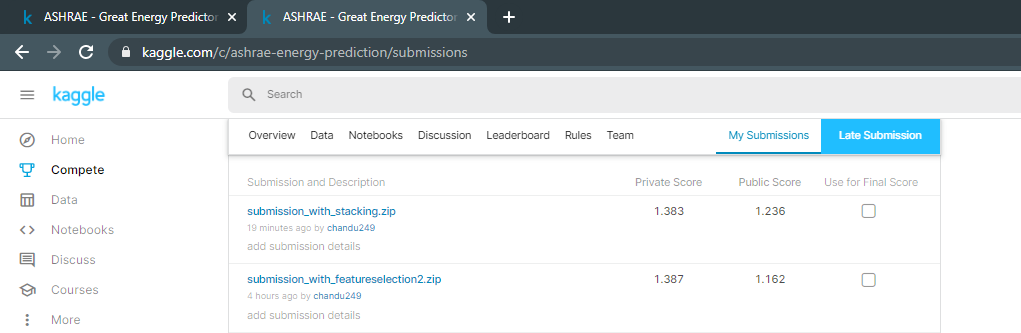

In [14]:
from IPython.display import Image
Image(filename='stacking.PNG', width=5000, height=5000)

## Summery of notebook

 1) Divided Train Data into 2 parts (df1) and (df2)
              
 2) Used df1 for base learners training then using these base learners predicted df2 readings (df2_pred) and test readings (test_pred)
 
 3) Then used df2_pred and y_df2 to train the meta regressor
 
 4) Then predicted the Final test labels from (test_pred)
       
       
      